In [1]:
# import neccessary library
from general_used_functions import *
import joblib

### Model Training 

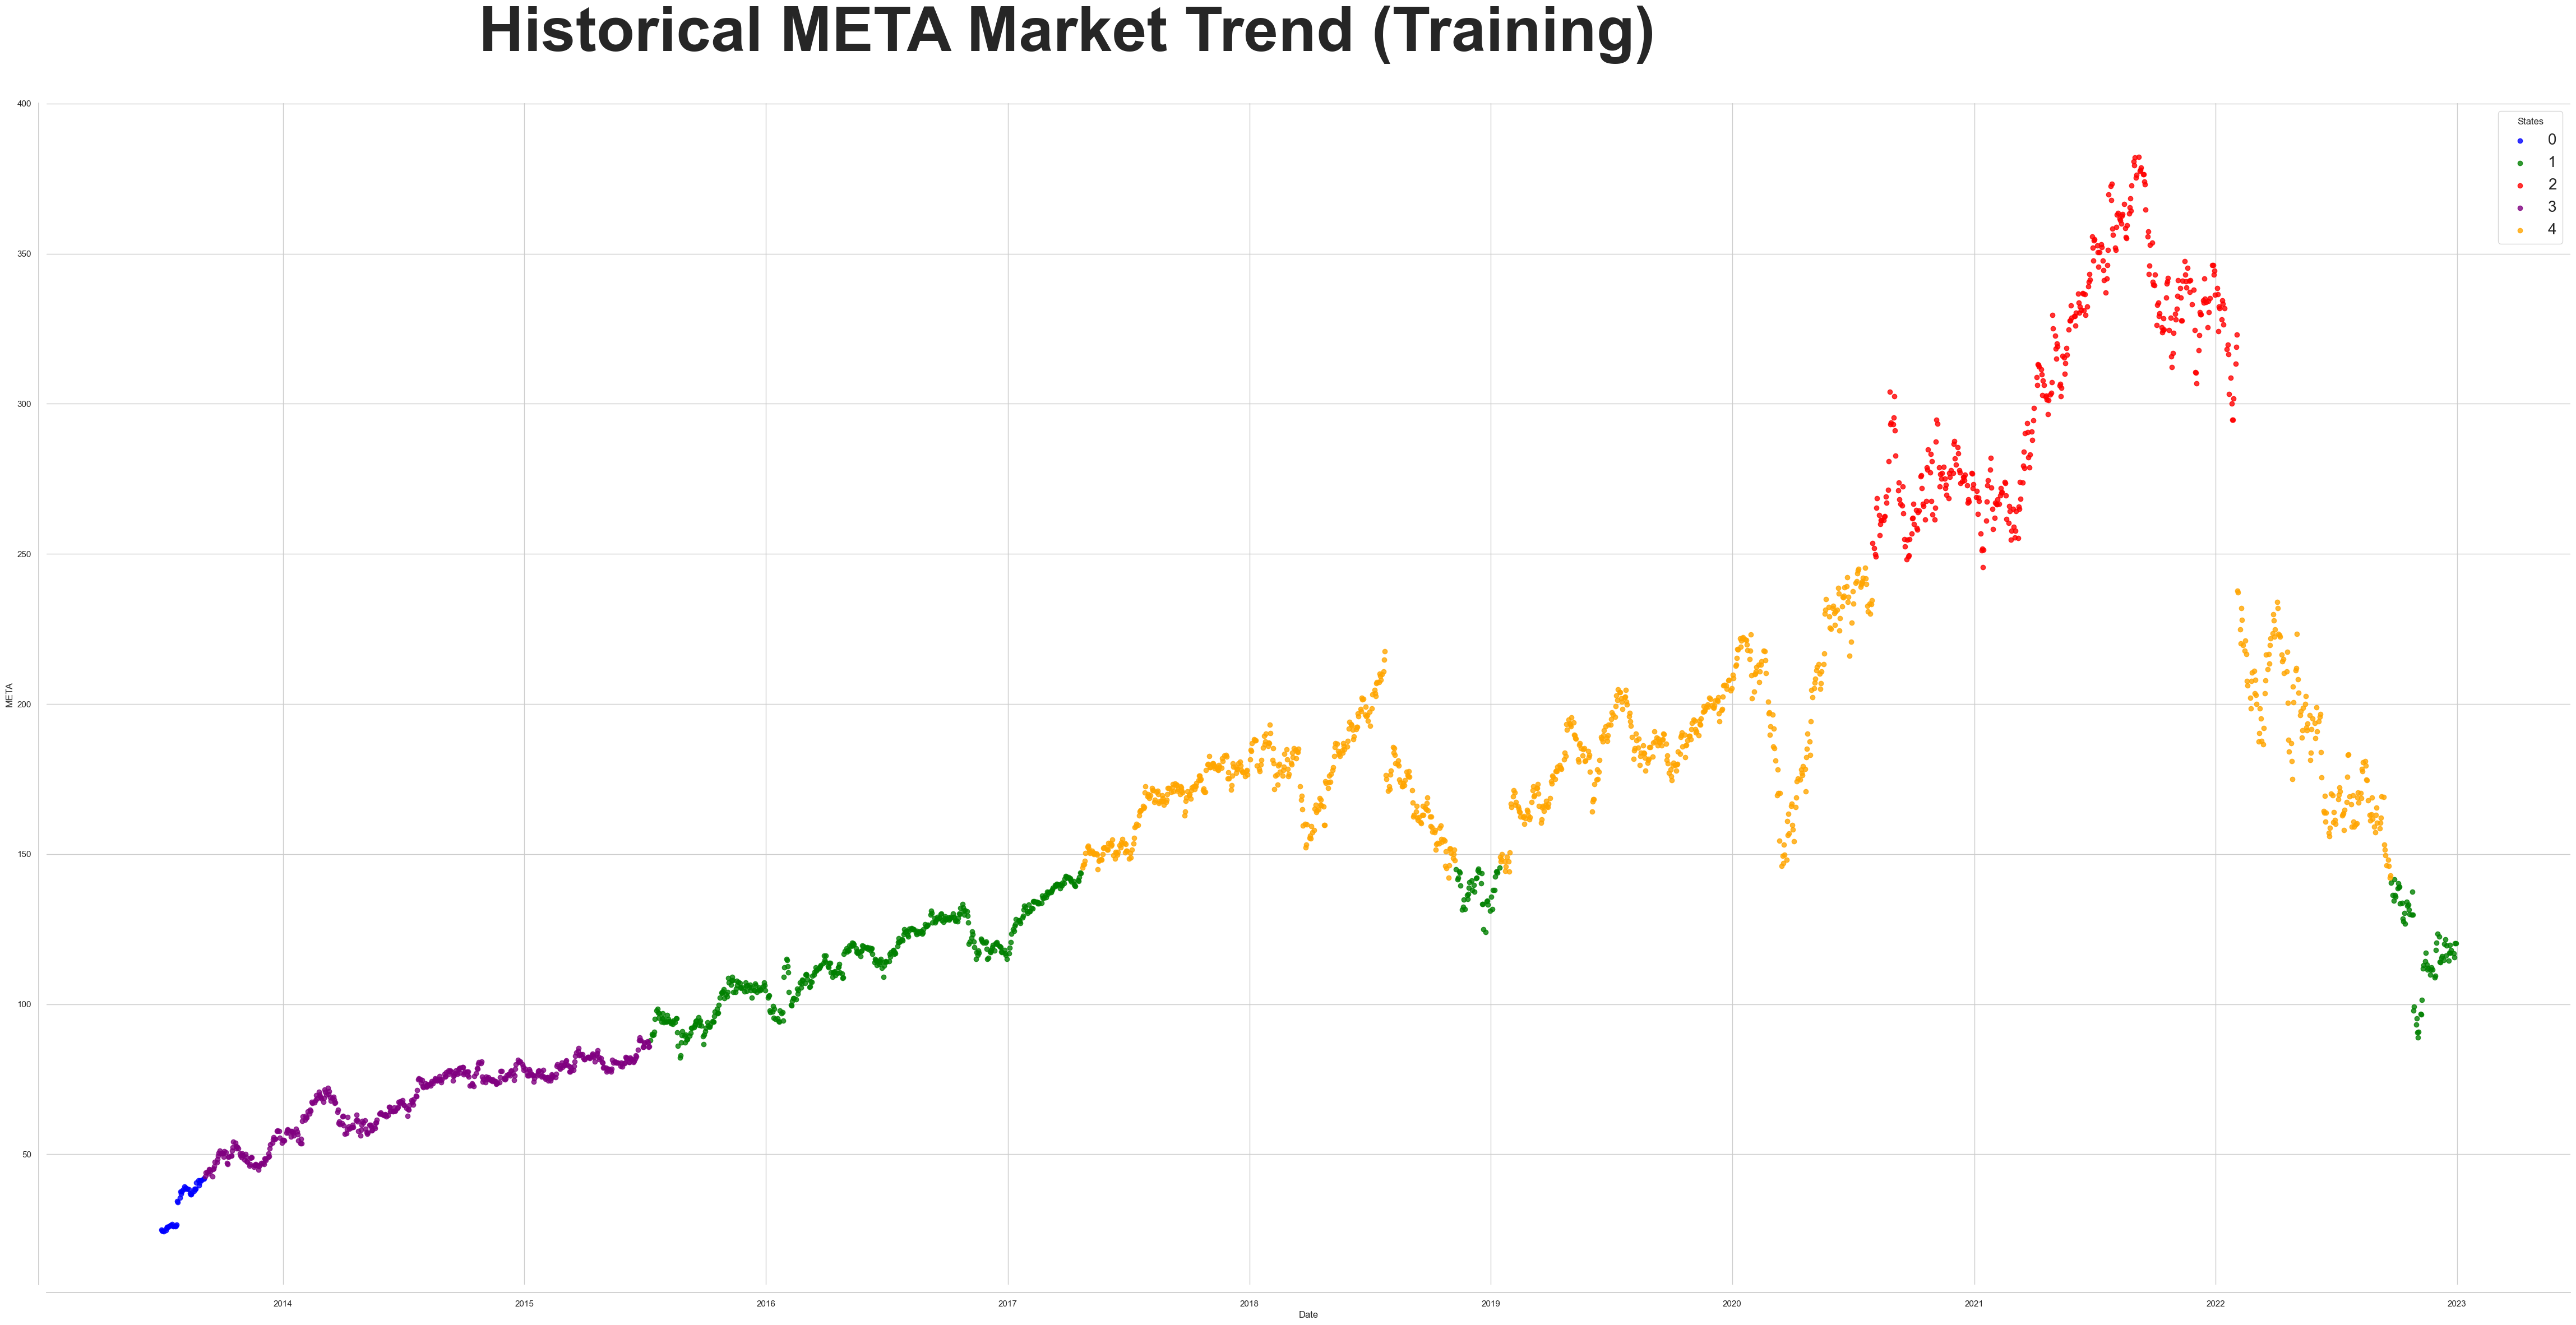

In [2]:
# Load training data
config_data = load_config_file()
stock_list = config_data['stock_dict']
training_stock_df = load_training_data()

stock = 'META'
target_columns = config_data['selected_features_dict'][stock]
train_df = training_stock_df[stock][target_columns]
model, states = HMM_training(stock, train_df, n_components=5)

In [3]:
# Save the model and states
save_HMM_states_excel(stock, states)
save_HMM_model(stock, model)

### Testing

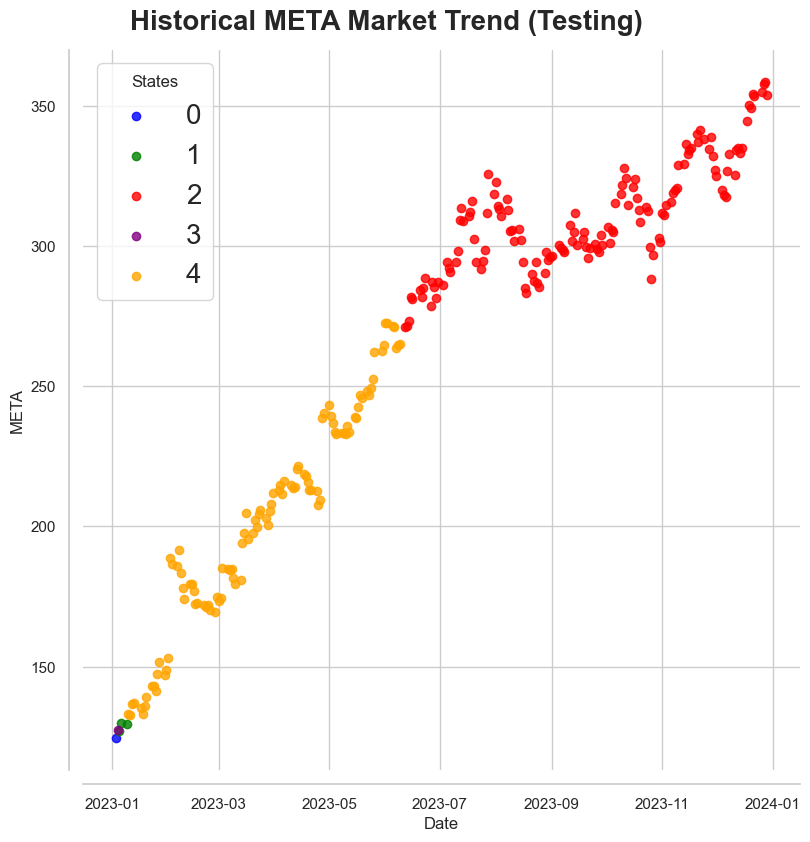

In [4]:
# Load testing data
config_data = load_config_file()
stock_list = config_data['stock_dict']
testing_stock_df = load_testing_data()
target_columns = config_data['selected_features_dict'][stock]
test_df = testing_stock_df[stock][target_columns]

model = joblib.load(f'model/{stock}_HMM_model.joblib')
states = HMM_testing(stock, test_df, model)

# Save the states
save_HMM_states_excel(stock, states, True)
